# Ejercicio análisis estructural de Vigas

In [1]:
#Importando librerías necesarias

import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, solve, integrate, Eq

## Definiendo variables simbólicas

In [2]:
# Definición de variables simbólicas
x, C1, C2, C3, C4 = symbols('x C1 C2 C3 C4')

## Definiendo constantes y parámetros

In [3]:
q1=98
q2=294
L=8.9
a=0.45*L
M=86
n=3
P=0.3*M
EI=200000*1000*0.3**4/12

## Definiendo las ecuaciones en función de x

In [4]:
q = (q1 - x**n + (q1 - q2) / (L**n))
pa = P * (x - a)**-1
ma = M * (x - a)**-2

## Calculando integrales definidias

In [5]:
# Cálculo de integrales definidas
Vc = integrate(0, x) + C1
Mc = integrate(Vc, x) + C2
tc = integrate(Mc / EI, x) + C3
vc = integrate(tc, x) + C4

Vq=integrate(q,x)
Mq=integrate(Vq,x)
tq=integrate(Mq/EI,x)
vq=integrate(tq,x)

## Definiendo ecuaciones adicionales

In [6]:
# Definición de ecuaciones adicionales
Vpm = P * (x - a)**0 + M * (x - a)**(-1)
Mpm = P * (x - a)**1 + M * (x - a)**0
tpm = (P * (x - a)**2 / 2 + M * (x - a)**1) / EI
vpm = (P * (x - a)**3 / 6 + M * (x - a)**2 / 2) / EI

## Resolución de ecuaciones

In [7]:
#Definición de expresiones
expr_vc_vq = vc + vq
expr_vc_vq_vpm= vc+vq+vpm
expr_Mc_Mq=Mc+Mq
expr_Mc_Mq_Mpm=Mc+Mq+Mpm

# Definición de las ecuaciones a resolver

eq1 = Eq(expr_vc_vq.subs(x, 0), 0)
eq2 = Eq(expr_vc_vq_vpm.subs(x, L), 0)
eq3 = Eq(expr_Mc_Mq.subs(x, 0), M)
eq4 = Eq(expr_Mc_Mq_Mpm.subs(x, L), M)

# Resolviendo el sistema de ecuaciones
solutions = solve((eq1, eq2, eq3, eq4), (C1, C2, C3, C4))
c1, c2, c3, c4 = solutions[C1], solutions[C2], solutions[C3], solutions[C4]


## Generando valores y evaluando ecuaciones de momento y de cortante

In [8]:
# Generación de arreglos de valores
x1 = np.linspace(0.001, a, 30)
x2 = np.linspace(a, L - 0.001, 30)

# Evaluación de ecuaciones de momento
M1 = [Mc.subs({C1: c1, C2: c2, C3: c3, C4: c4, x: x_val}) for x_val in x1]
M2 = [Mc.subs({C1: c1, C2: c2, C3: c3, C4: c4, x: x_val}) + Mpm.subs({C1: c1, C2: c2, C3: c3, C4: c4, x: x_val}) for x_val in x2]

# Evaluación de ecuaciones de cortante
V1 = [Vc.subs({C1: c1, C2: c2, C3: c3, C4: c4, x: x_val}).evalf() + vq.subs({C1: c1, C2: c2, C3: c3, C4: c4, x: x_val}).evalf() for x_val in x1]

V2 = []
for x_val in x2:
    v2_val = Vc.subs({C1: c1, C2: c2, C3: c3, C4: c4, x: x_val}).evalf() + vq.subs({C1: c1, C2: c2, C3: c3, C4: c4, x: x_val}).evalf() + vpm.subs({C1: c1, C2: c2, C3: c3, C4: c4, x: x_val}).evalf()
    if v2_val.is_real:
        V2.append(v2_val)

## Gráficos de momento y cortante


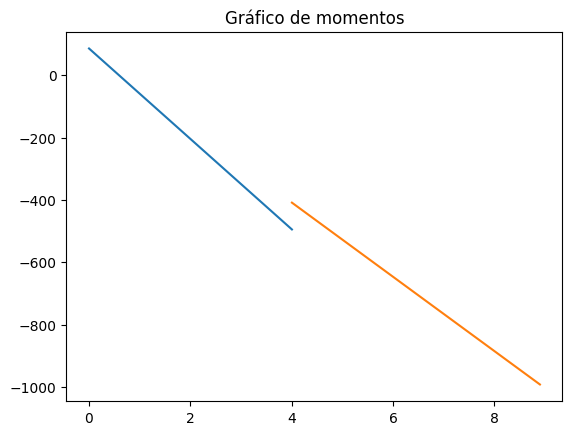

In [9]:
# Gráficos de momento y cortante
plt.plot(x1, M1)
plt.plot(x2, M2)
plt.title("Gráfico de momentos")
plt.show()



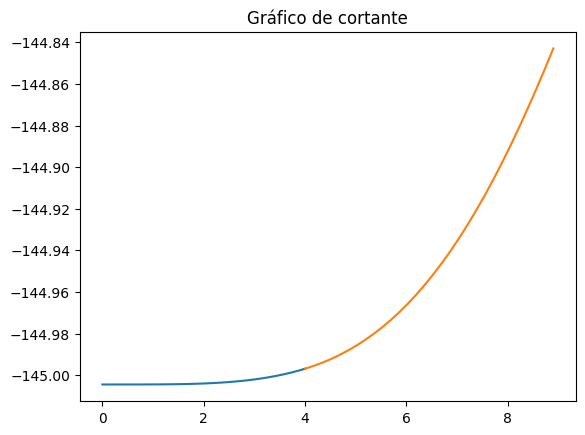

In [10]:
plt.plot(x1, V1)
plt.plot(x2, V2)
plt.title("Gráfico de cortante")
plt.show()